In [2]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import KFold
from sklearn import datasets
import itertools
import matplotlib.pylab as plt
plt.style.use('ggplot')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [4]:
data = pd.DataFrame(np.random.uniform(-10,10,size=(600,10)),columns=('a','b','c','d','e','f','g','h','i','k'))
data.head()
X = data[data.columns.difference(['k'])].as_matrix()
Y = pd.qcut(data['k'],q=2,labels=[0,1]).astype(int).as_matrix()

#iris = datasets.load_iris()
#X = iris.data  
#Y = iris.target

In [3]:
#data = pd.read_csv('https://www.dropbox.com/s/0w5qlre97sogef8/sqf_train_cpw.csv?dl=1')

In [21]:
for col,dtyp in zip(data.columns,data.dtypes):
    if (dtyp!='int64')&(dtyp!='float64'):
        t = pd.Categorical(data[col])
        data[col] = t.labels

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: 'labels' is deprecated. Use 'codes' instead


In [22]:
X = data[data.columns.difference(['id','found.weapon','found.gun','arrested'])].as_matrix()
Y = data['found.gun'].as_matrix()
Y = np.where(Y==False,0,1)
data.head(2)

,id,year,found.weapon,found.gun,arrested,suspect.race,suspect.age,suspect.build,suspect.sex,suspect.height,...,additional.associating,additional.direction,additional.highcrime,additional.time,additional.sights,additional.other,radio.run,day,month,time.period
0,1565349,2009,0,0,0,2,-0.016428,3,1,0.027557,...,0,1,0,0,0,0,0,2,4,6
1,2582029,2010,0,0,0,1,-0.418262,3,1,1.007377,...,0,1,0,0,0,0,0,0,10,5


In [8]:
# http://scikit-learn.org/stable/auto_examples/plot_digits_pipe.html
pca = PCA(n_components=10)
forest = RandomForestClassifier()
pipe = Pipeline(steps=[('pca', pca), ('forest', forest)])

In [28]:
print X.shape
print Y.shape
print np.unique(Y)

(310652, 36)
(310652,)
[0 1]


In [29]:
X_train, X_test = train_test_split(X, test_size=0.2, random_state=21)
Y_train, Y_test = train_test_split(Y, test_size=0.2, random_state=21)

In [30]:
pca.fit(X_train)

PCA(copy=True, n_components=10, whiten=False)

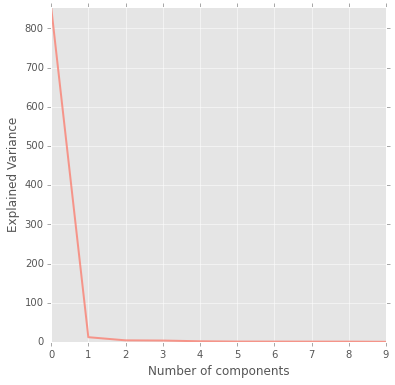

In [31]:
plt.figure(1, figsize=(6, 6))
plt.plot(pca.explained_variance_, linewidth=2, c='salmon', alpha=0.8)
plt.axis('tight')
plt.xlabel('Number of components');
plt.ylabel('Explained Variance');

In [9]:
#check parameters for GridSearchCV using estimator.get_params().keys()
n_components = [1,2,3,4]#,5,6,7]
max_features = ['auto','sqrt','log2']
criterion = ['gini','entropy']
n_estimators = [3,6,9]
estimator = GridSearchCV(pipe,dict(pca__n_components=n_components,
                    forest__n_estimators=n_estimators, forest__criterion=criterion,
                    forest__max_features=max_features),iid=True,cv=5,refit=True)

In [33]:
estimator.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('pca', PCA(copy=True, n_components=10, whiten=False)), ('forest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'forest__max_features': ['auto', 'sqrt', 'log2'], 'pca__n_components': [1, 2, 3, 4], 'forest__n_estimators': [3, 6, 9], 'forest__criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

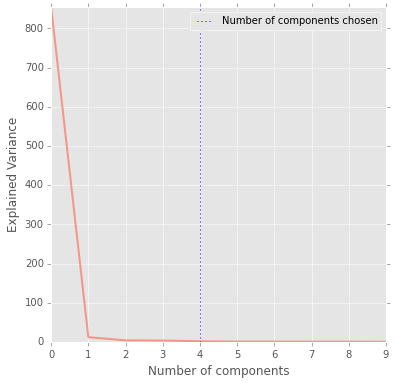

In [34]:
plt.figure(1, figsize=(6, 6))
plt.plot(pca.explained_variance_, linewidth=2, c='salmon', alpha=0.8)
plt.axis('tight')
plt.xlabel('Number of components');
plt.ylabel('Explained Variance');
plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='Number of components chosen')
plt.legend(prop=dict(size=10))
plt.show()

In [35]:
print estimator.best_estimator_
print estimator.best_params_

Pipeline(steps=[('pca', PCA(copy=True, n_components=4, whiten=False)), ('forest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])
{'forest__max_features': 'sqrt', 'pca__n_components': 4, 'forest__n_estimators': 9, 'forest__criterion': 'entropy'}


In [36]:
estimator.best_score_

0.99613312355897488

In [149]:
pca = PCA(n_components=2)
pca.fit(X_train)
forest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=3, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False).fit(pca.fit_transform(X_train),Y_train)

In [150]:
forest.feature_importances_

array([ 0.86823105,  0.13176895])

In [152]:
accuracy_score(Y_test,forest.predict(pca.fit_transform(X_test)))

0.29999999999999999

### Manual Random Forest

In [72]:
from gridsearch import get_results

In [63]:
def get_results(n_components,max_features,criterion,n_estimators):
    kf = KFold(n=len(X), n_folds=12, shuffle=True, random_state=21)
    d = []
    for train_index, test_index in kf:
        for rf_features,criter,rf_estimators in itertools.product(max_features,criterion,n_estimators):
            X_tr, X_test = X[train_index], X[test_index]
            X_train, X_validation = train_test_split(X_tr, test_size=0.2, random_state=21)
            Y_tr, Y_test = Y[train_index], Y[test_index]
            Y_train, Y_validation = train_test_split(Y_tr, test_size=0.2, random_state=21)
            del X_tr
            del Y_tr
            forest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion=criter,
                    max_depth=None, max_features=rf_features, max_leaf_nodes=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=rf_estimators, n_jobs=1,
                    oob_score=False, random_state=21, verbose=0,
                    warm_start=False)
            forest.fit(X_train,Y_train)
            forest_pred = forest.predict(X_validation)
            name = '%s,%s,%s'%(str(rf_features),str(criter),str(rf_estimators))
            d.append((name,accuracy_score(Y_validation,forest_pred),X_train,X_test,Y_train,Y_test))
            #forest_probs = forest.predict_proba(X_test)
            #sig_clf = CalibratedClassifierCV(forest, method="sigmoid", cv="prefit")
            #sig_clf.fit(X_validation, Y_validation)
            #sig_clf_probs = sig_clf.predict_proba(X_test)
            #sig_score = log_loss(Y_test, sig_clf_probs) 
    return sorted(d, key=lambda tup: tup[1])[-1]

In [73]:
best = get_results(n_components,max_features,criterion,n_estimators)

NameError: global name 'KFold' is not defined

In [71]:
best_params,X_train_best,X_test_best,Y_train_best,Y_test_best = best[0].split(','),best[2],best[3],best[4],best[5]
print X_train_best.shape
print Y_train_best.shape
forest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion=best_params[1],
                max_depth=None, max_features=best_params[0], max_leaf_nodes=None,
                min_samples_leaf=1, min_samples_split=2,
                min_weight_fraction_leaf=0.0, n_estimators=int(best_params[2]), n_jobs=1,
                oob_score=False, random_state=21, verbose=0,
                warm_start=False)
forest.fit(X_train_best,Y_train_best)
print accuracy_score(Y_test_best,forest.predict(X_test_best))

(440, 9)
(440,)
0.62
